In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("DATASETS/winequality-red.csv",sep=",")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
#VIENDO UNICOS
columns=df.columns
for i in columns:
    print(i)
    print(df[i].unique())

fixed acidity
[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
volatile acidity
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35 

In [6]:
print("Is there any Duplicate Records => ",df.duplicated().any())
print("-"*42)
print("Total Duplicate Records present is =>",df[df.duplicated()==True].shape[0])

Is there any Duplicate Records =>  True
------------------------------------------
Total Duplicate Records present is => 240


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# Viendo la cantidad de nulos
missing_values_count = df.isnull().sum()
missing_values_greater_than_zero = missing_values_count[missing_values_count > 0]
print(missing_values_greater_than_zero)

Series([], dtype: int64)


In [9]:
# Viendo si la data esta balanceada
conteo_filas = df['quality'].value_counts()
suma_total = conteo_filas.sum()
print(conteo_filas)
print("Suma total:", suma_total)


quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64
Suma total: 1359


In [10]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
96,pH,fixed acidity,-0.686685,0.686685
8,fixed acidity,pH,-0.686685,0.686685
84,density,fixed acidity,0.670195,0.670195
7,fixed acidity,density,0.670195,0.670195
2,fixed acidity,citric acid,0.667437,0.667437
24,citric acid,fixed acidity,0.667437,0.667437
66,free sulfur dioxide,total sulfur dioxide,0.667246,0.667246
77,total sulfur dioxide,free sulfur dioxide,0.667246,0.667246
25,citric acid,volatile acidity,-0.551248,0.551248
14,volatile acidity,citric acid,-0.551248,0.551248


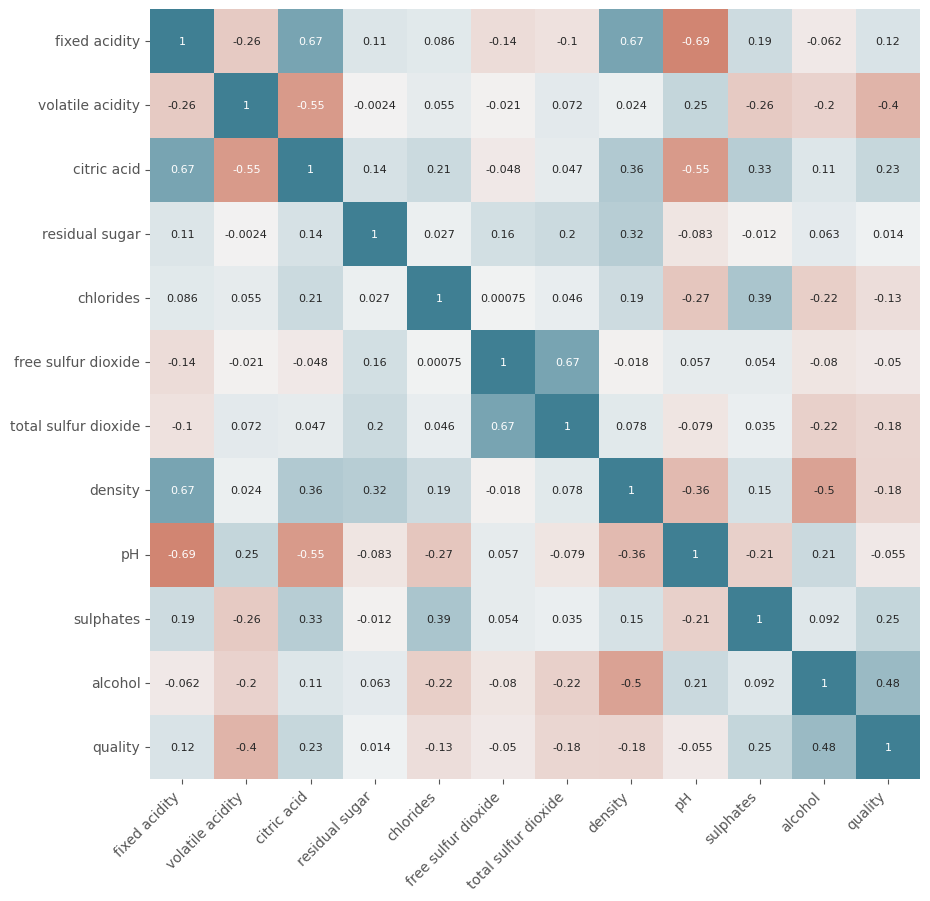

In [11]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

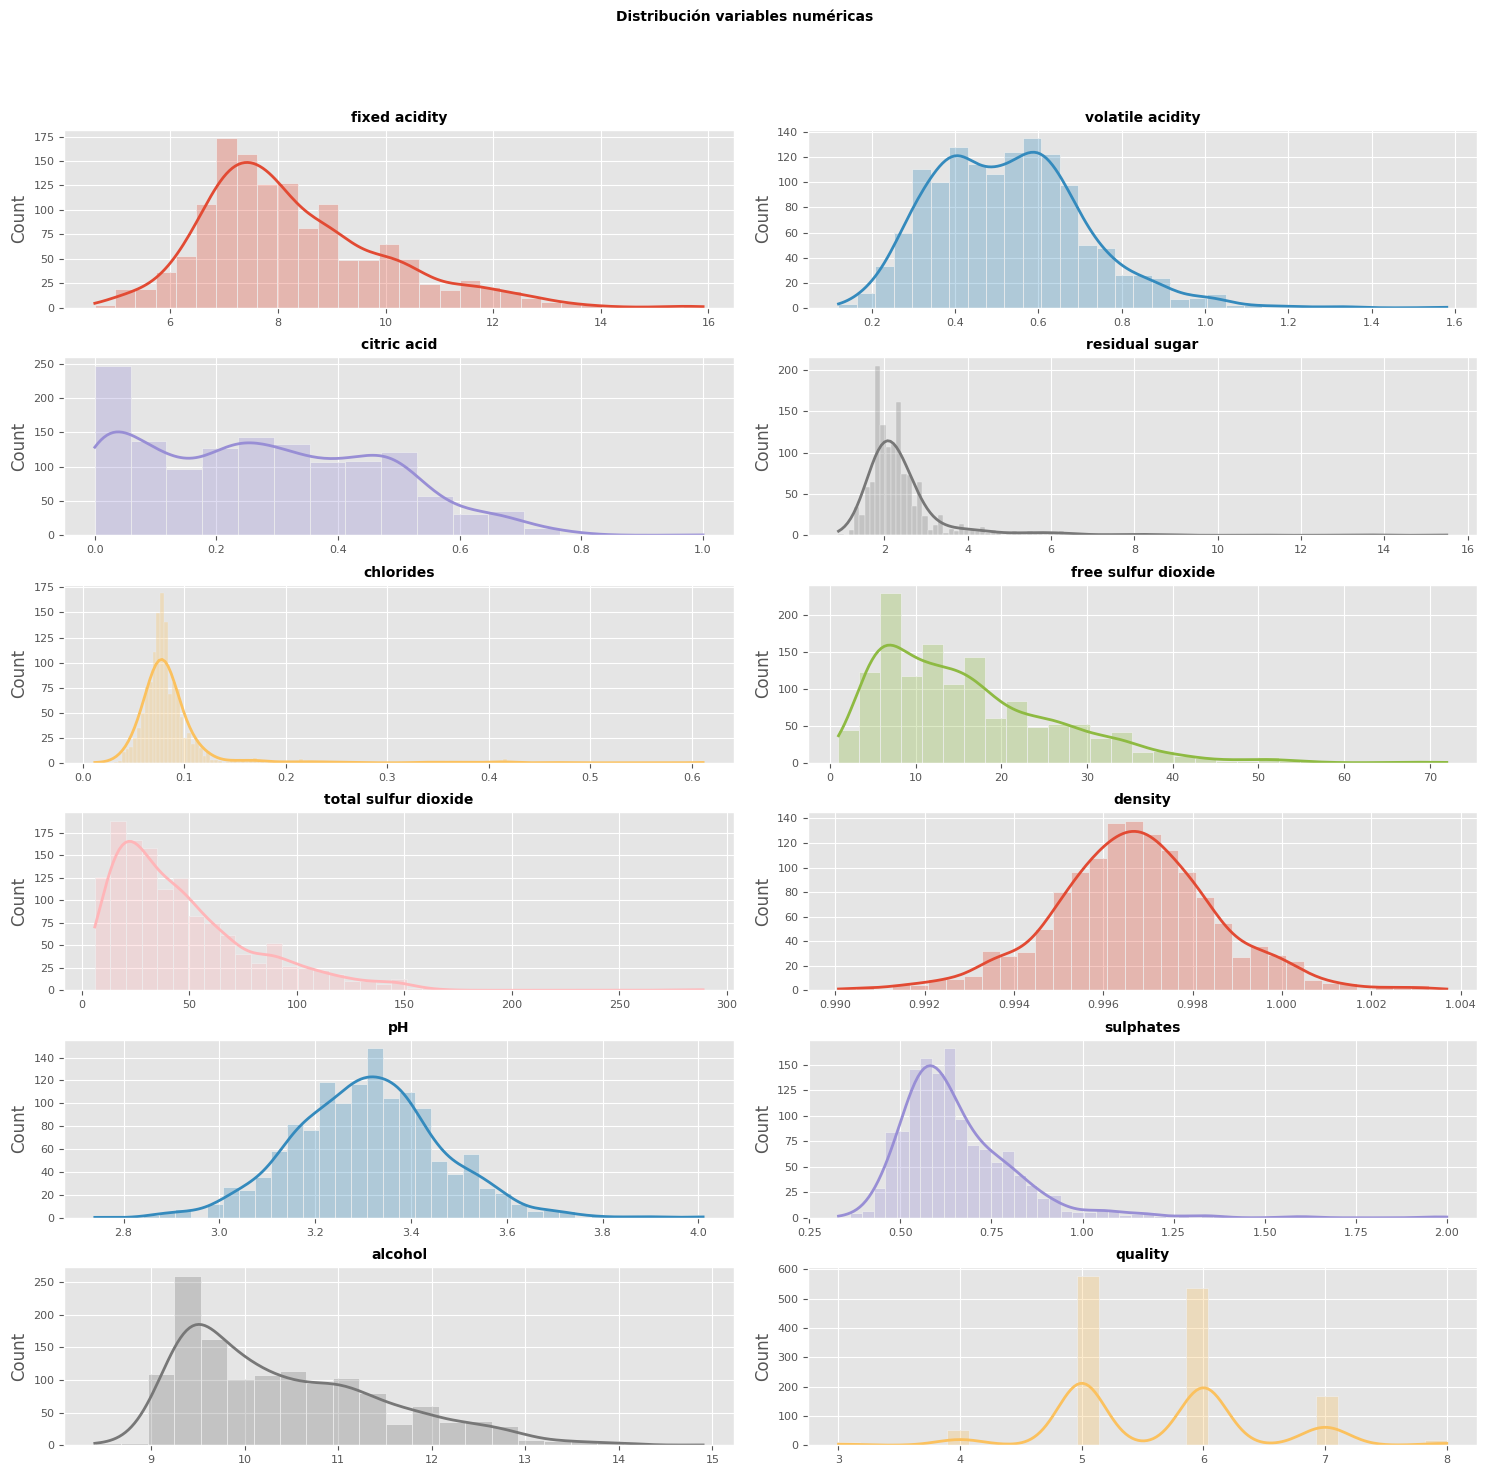

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar número de subplots en función del número de columnas
num_cols = len(df.select_dtypes(include=['float64', 'int']).columns)
num_rows = (num_cols + 1) // 2  # Ensure at least 1 row and round up if needed
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 15))
axes = axes.flat

columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data=df,
        x=colum,
        stat="count",
        kde=True,
        color=(list(plt.rcParams['axes.prop_cycle']) * 2)[i]["color"],
        line_kws={'linewidth': 2},
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(colum, fontsize=10, fontweight="bold")
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")

# Hide any unused subplots
for j in range(num_cols, num_rows * 2):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight="bold")

plt.show()


In [13]:
# División de los datos en train y test
# ==============================================================================
X = df.drop("quality", axis=1)
y = df['quality']

In [14]:
# YA CON LA DATA TRANSFORMADA, PROCEDEREMOS A ITERAR LOS MODELOS QUE SE AJUSTEN A NUESTRO PROBLEMA PARA ENCONTRAR EL MEJOR

from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_predict
import numpy as np

#ESTABLECEMOS LOS DATOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)


modelos = {
    'SVR': SVR(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'SGDRegressor': SGDRegressor(random_state=42),
    'BayesianRidge': BayesianRidge(),
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    "RANSACRegressor": RANSACRegressor(random_state=42),
    "GradienBoostRegressor": GradientBoostingRegressor(random_state=42),
    "XgboostRegressor": xgb.XGBRegressor(random_state=42),
    "NeuralNetworkRegressor": MLPRegressor(random_state=42),
    "LightGbmRegressor": lgb.LGBMRegressor(random_state=42),
}

#CREANDO LAS LISTAS
modelo_resultado = []
modelo_nombre = []

# ENTRENANDO EL MODELO
for nombre,modelo in modelos.items():
    a = modelo.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    modelo_resultado.append(score)
    modelo_nombre.append(nombre)
    
    #CREANDO LA LISTA DE RESULTADOS
    df_resultados = pd.DataFrame([modelo_nombre,modelo_resultado])
    df_resultados = df_resultados.transpose()
    df_resultados = df_resultados.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_resultados)

RMSE_TOPMODELO=df_resultados["RMSE"].min()
df_resultados=df_resultados.reset_index()
df_resultados=df_resultados.drop("index", axis=1)
df_resultados=df_resultados.set_index("RMSE")
df_resultados.index.get_loc(RMSE_TOPMODELO)
df_resultados=df_resultados.iloc[11,0]
print("EL MEJOR MODELO PARA EL PROBLEMA ES: "+ df_resultados)
print("RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: "+str(RMSE_TOPMODELO))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 951, number of used features: 11
[LightGBM] [Info] Start training from score 5.624606
                     Model                 RMSE
3             SGDRegressor  923125275338.563232
2               ElasticNet              0.81034
0                      SVR             0.749346
9         XgboostRegressor             0.694387
7          RANSACRegressor             0.692485
10  NeuralNetworkRegressor             0.656654
5         LinearRegression             0.646952
4            BayesianRidge             0.646543
1                    Ridge              0.64615
11       LightGbmRegressor        

In [15]:

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# CREAMOS UN OBJETO DE REGRESIÓN LINEAL
modelo = RandomForestRegressor(random_state=42)

Lista_RMSE = []
Posicion_RMSE = []
elementos=len(X.columns)


#COMENZAREMOS A ITERAR PARA VER CON QUE CANTIDAD DE VARIABLES SE TIENE EL MENOR RMSE
for i in range(elementos):
    # CREAMOS UN OBJETO RFE PARA SELECCIONAR n CARACTERÍSTICAS
    rfe = RFE(modelo,n_features_to_select=i+1)

    # AJUSTAMOS EL MODELO RFE AL CONJUNTO DE DATOS
    X_rfe_train = rfe.fit_transform(X_train, y_train)
    X_rfe_test = rfe.transform(X_test)

    #ENTRENAMOS EL NUEVO MODELO
    modelo.fit(X_rfe_train, y_train)
    y_pred = modelo.predict(X_rfe_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    Lista_RMSE.append(rmse)
    print("Con "+str(i+1)+" variables se obtiene un RMSE de "+str(rmse))
    Posicion_RMSE.append(i+1)

posicion=pd.Series(Lista_RMSE).idxmin()
cant_var_usar=Posicion_RMSE[posicion]

#ESTA VEZ APLCIAREMOS OTRA VEZ RFE PERO PARA PODER EXTRAER LAS VARIABLES A FILTRAR
rfe = RFE(modelo,n_features_to_select=cant_var_usar)
rfe.fit(X_train, y_train)

# Utilizamos la máscara booleana para obtener solo las columnas seleccionadas
X_train = pd.DataFrame(X_train, columns = X_train.columns[rfe.get_support()])
X_test = pd.DataFrame(X_test, columns = X_test.columns[rfe.get_support()])

cabeceras_nuevas=X_test.columns

# APLICAMOS EL MODELO
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

RMSE_NUEVO = np.sqrt(mean_squared_error(y_test, y_pred))
print("LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE: ",cant_var_usar)
print("VARIABLES SELECCIONADAS POR RFE: ",cabeceras_nuevas)
print("RMSE DESPUES DEL RFE: "+str(RMSE_NUEVO))

Con 1 variables se obtiene un RMSE de 0.7519695342440712
Con 2 variables se obtiene un RMSE de 0.7201098115412343
Con 3 variables se obtiene un RMSE de 0.6591076605485883
Con 4 variables se obtiene un RMSE de 0.6281013250342686
Con 5 variables se obtiene un RMSE de 0.6265715535872227
Con 6 variables se obtiene un RMSE de 0.6170005720275735
Con 7 variables se obtiene un RMSE de 0.6204177119126291
Con 8 variables se obtiene un RMSE de 0.6229057068351863
Con 9 variables se obtiene un RMSE de 0.6212242814339578
Con 10 variables se obtiene un RMSE de 0.6258960243789166
Con 11 variables se obtiene un RMSE de 0.6190946504974096
LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE:  6
VARIABLES SELECCIONADAS POR RFE:  Index(['volatile acidity', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')
RMSE DESPUES DEL RFE: 0.6170005720275735


In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#utilizar LassoCV para seleccionar variables
reg_lasso = LassoCV(cv=5)
reg_lasso.fit(X_train, y_train)

coef = pd.Series(reg_lasso.coef_, index = X_train.columns)
LASSO_VARS=coef[coef!=0].index.tolist()

print("VARIABLES SELECCIONADAS POR LASSO REGRESIÓN: ",LASSO_VARS)

# Uso de las variables seleccionadas para entrenamiento
X_train_l = X_train[LASSO_VARS]
X_test_l = X_test[LASSO_VARS]



# Entrenar un modelo de regresión lineal
reg_model = RandomForestRegressor()
reg_model.fit(X_train_l, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = reg_model.predict(X_test_l)

# Calcular el RMSE y el MAE de la regresión lineal
LASSO_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE DESPUES DE LA SELECCIÓN DE VARIABLES POR LASSO REGRESIÓN: ", LASSO_RMSE)


#ESTABLECEMOS LAS VARIABLES FINALES A USAR EN LA DATA
if LASSO_RMSE<RMSE_NUEVO:
    X_train = X_train_l
    X_test = X_test_l
    print("SE CAMBIA EL RMSE ANTERIOR")
else:
    print("SE MANTIENE EL RMSE ANTERIOR")


VARIABLES SELECCIONADAS POR LASSO REGRESIÓN:  ['volatile acidity', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
RMSE DESPUES DE LA SELECCIÓN DE VARIABLES POR LASSO REGRESIÓN:  0.6183388166344264
SE MANTIENE EL RMSE ANTERIOR


#### **ENTRENAMIENTO FINAL DEL MODELO**

In [17]:
# ENTRENAMOS POR ULTIMA VEZ EL MODELO
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
RMSE_TOP = np.sqrt(mean_squared_error(y_test, y_pred))


#### **EVALUACIÓN DEL MODELO**

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculamos el error cuadrático medio (MSE)
MSE = mean_squared_error(y_test, y_pred)
print("MSE: "+str(MSE))

# Calculamos el error absoluto medio (MAE)
MAE = mean_absolute_error(y_test, y_pred)
print("MAE: "+str(MAE))

# Calculamos el coeficiente de determinación R^2
R2 = r2_score(y_test, y_pred)
print("R^2: "+str(R2))


MSE: 0.3806897058823529
MAE: 0.4708823529411765
R^2: 0.4374760889441215


#### **HIPERPARAMETRIZACION**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Definición del espacio de búsqueda de hiperparámetros
param_grid = {"max_depth":[3,4,5,6,7,8],
                "min_samples_split":[3,4,5,6,7,8],
                "min_samples_leaf":[3,4,5,6,7,8],
                "n_estimators": [50,70,90,100],
                "criterion":["gini","entropy"]}

# Definición de la búsqueda
grid_search = GridSearchCV(
    estimator=modelo, 
    param_grid=param_grid, 
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Métrica a optimizar
    verbose=2,  # Imprimir detalles
    n_jobs=-1  # Utilizar todos los núcleos disponibles
)

# Ejecución de la búsqueda
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 5040 candidates, totalling 25200 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=0; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=0; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=0; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=0; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=0; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42

KeyboardInterrupt: 

best_params = grid_search.best_params_
best_C = best_params['C']
best_penalty = best_params['penalty']

In [ ]:
# Mostrar los mejores hiperparámetros encontrados
print(grid_search.best_params_)

In [ ]:
# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Crear un nuevo modelo RandomForestRegressor con los mejores parámetros
best_model = RandomForestRegressor(**best_params)

# Entrenar el modelo
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular el RMSE del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)


#### **EVALUACIÓN DEL MODELO**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculamos el error cuadrático medio (MSE)
MSE = mean_squared_error(y_test, y_pred)
print("MSE: "+str(MSE))

# Calculamos el error absoluto medio (MAE)
MAE = mean_absolute_error(y_test, y_pred)
print("MAE: "+str(MAE))

# Calculamos el coeficiente de determinación R^2
R2 = r2_score(y_test, y_pred)
print("R^2: "+str(R2))


#### **DETALLES DEL MODELO**

In [ ]:
# Obtener la importancia de las características
importancias = modelo.feature_importances_

# Crear un DataFrame para visualizar las importancias
importancias_df = pd.DataFrame({'caracteristica': X_train.columns, 'importancia': importancias})


In [ ]:
features = importancias_df.sort_values(by="importancia",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="importancia", y="caracteristica", data=features)
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()